<a href="https://colab.research.google.com/github/Vigneshprabhu078/Machine-Learning-Models/blob/main/Linear_Regression_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

## **Gradient Regression**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

## **Learning Rate**
Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


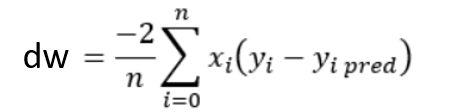



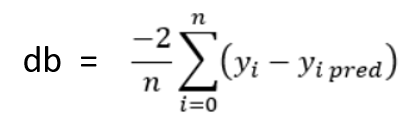

In [1]:
#import libraries
import numpy as np

## **Linear Regression**

In [2]:
class LinearRegression():

 # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b



**Using Linear Regeression and Made prediction**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**Data Preprocessing**

In [4]:
#loading the data into csv file to Pandas DataFrame
salary = pd.read_csv('/content/salary_data.csv')

In [5]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary.shape

(30, 2)

In [7]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Splitting feature and Target**

In [8]:
X= salary.iloc[:,:-1].values
Y= salary.iloc[:,1].values

In [9]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Splitting Data into Training and Testing Data**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

**Model Training**

In [12]:
model=LinearRegression(learning_rate=0.02, no_of_iterations=1000)

In [13]:
model.fit(X_train, Y_train)

In [14]:
#Printing the parameter values(weight and bias)
print('Weight :' , model.w[0])
print('Bias :' , model.b)

Weight : 9514.400999035135
Bias : 23697.406507136307


# **y=mx+c**

Salary=9514(Year of experience)+23697



**Predict the salary value of test data**

In [16]:
test_pred=model.predict(X_test)
print(test_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


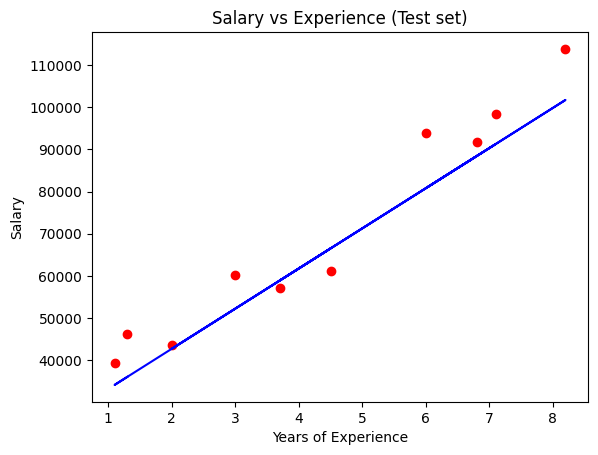

In [18]:
#Plot Predicted values and Actual Values
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_pred, color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()